<a href="https://colab.research.google.com/github/asarm/ML_Projects/blob/main/product_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import LabelEncoder 

In [206]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/udemy_ml

/content/drive/MyDrive/Colab Notebooks/udemy_ml


In [207]:
df = pd.read_csv('products.csv')
df.head(5)

,1,apple iphone 8 plus 64gb silver,1.1,1.2,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
0,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [208]:
print(df.keys())

df['Title'] = df['apple iphone 8 plus 64gb silver']
df['Label'] = df['Mobile Phones']
df = df.drop(['1','apple iphone 8 plus 64gb silver','1.1','1.2','Apple iPhone 8 Plus 64GB','2612','Mobile Phones'], axis=1)
df['Label'] = df['Label'].str.lower()

encoder = LabelEncoder()
label_id = encoder.fit_transform(df['Label'])
classes = encoder.classes_
df['label_id'] = label_id

df.head(3)

Index(['1', 'apple iphone 8 plus 64gb silver', '1.1', '1.2',
       'Apple iPhone 8 Plus 64GB', '2612', 'Mobile Phones'],
      dtype='object')


,Title,Label,label_id
0,apple iphone 8 plus 64 gb spacegrau,mobile phones,7
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,mobile phones,7
2,apple iphone 8 plus 64gb space grey,mobile phones,7


In [209]:
labels = df['Label']
print(len(labels.unique()))
uniques = (labels.unique())
unique_labels = df['label_id'].unique()
values = labels.value_counts().values
print(labels.value_counts())

10
fridge freezers     5501
mobile phones       4080
washing machines    4044
cpus                3862
fridges             3584
tvs                 3564
dishwashers         3424
digital cameras     2697
microwaves          2342
freezers            2212
Name: Label, dtype: int64


In [210]:
weights = {}
for index,value in enumerate(values):
  weights[unique_labels[index]] = (value/len(df))*100

weights

{0: 11.45284621920136,
 1: 10.937411498159163,
 2: 10.093457943925234,
 3: 7.638062871707732,
 4: 6.632681959784764,
 5: 6.26451430189748,
 6: 10.150099122061738,
 7: 15.579156046445766,
 8: 11.554800339847068,
 9: 9.696969696969697}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

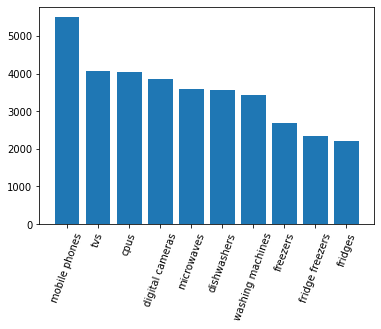

In [68]:
plt.bar(uniques,values)
plt.xticks(rotation=70)

# TF-idf

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Title']).toarray()
y = df['label_id'].values

pickle.dump(tfidf, open("tfidf_products.pickle", "wb"))

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [213]:
from sklearn.naive_bayes import MultinomialNB

nbmodel = MultinomialNB()
nbmodel.fit(x_train, y_train)

y_pred_nb = nbmodel.predict(x_test)

print("Training Accuracy:", nbmodel.score(x_train,y_train))
print("Testing Accuracy:", nbmodel.score(x_test,y_test))

Training Accuracy: 0.9435206538010277
Testing Accuracy: 0.9321249881997545


In [214]:
from sklearn.linear_model import SGDClassifier

sgdmodel = SGDClassifier(class_weight=weights)
#sgdmodel = SGDClassifier()
sgdmodel.fit(x_train, y_train)

y_pred_sgd = sgdmodel.predict(x_test)

print("Training Accuracy:", sgdmodel.score(x_train,y_train))
print("Testing Accuracy:", sgdmodel.score(x_test,y_test))

Training Accuracy: 0.9740664320103573
Testing Accuracy: 0.9570471065798168


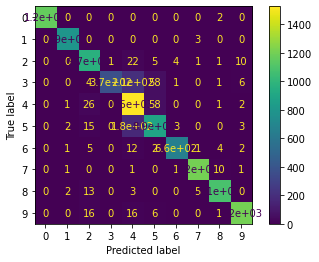

In [184]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nbmodel, x_test, y_test)

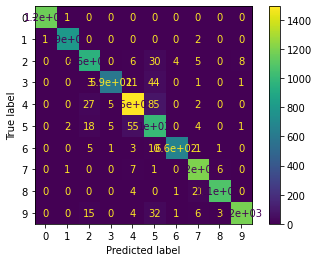

In [185]:
plot_confusion_matrix(sgdmodel, x_test, y_test)

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      1.00      1.00       797
           2       0.98      0.90      0.94      1011
           3       0.95      0.93      0.94       651
           4       0.90      0.96      0.93      1613
           5       0.93      0.88      0.91      1090
           6       0.98      0.96      0.97       686
           7       0.97      0.99      0.98      1218
           8       0.99      0.98      0.98      1111
           9       0.93      0.97      0.95      1248

    accuracy                           0.96     10593
   macro avg       0.96      0.96      0.96     10593
weighted avg       0.96      0.96      0.96     10593

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       0.99      1.00      0.99       797
           2       0.92      0.96      0.94      1011
           3       1.00 

In [218]:
def predict(model, tfid):
  text = input("Enter the Product Name: ")
  text = tfidf.transform([text]).toarray()
  pred = sgdmodel.predict(text.reshape(1,-1))
  print(" ".join(tfidf.inverse_transform(text)[0])," --> ",classes[pred[0]])

In [221]:
tfid = pickle.load(open('tfidf_products.pickle', 'rb'))
predict(sgdmodel, tfidf)

Enter the Product Name: samsung crystal uhd
crystal samsung uhd  -->  tvs
